### View and compare time series


In [1]:
# Import packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import scipy.optimize as spop
import matplotlib.pyplot as plt

print("Yahoo Finance: ", yf.__version__)

Yahoo Finance:  0.2.55


In [42]:
# Specifying parameters
stocks = ['FTEC', 'QTUM', 'BLOK', 'TSLA']
colors = ['blue', 'red', 'green', 'brown']
start = '2024-10-01'
# start = '2021-12-31'
end = '2025-03-20'

# Retrieving data
data = pd.DataFrame()
for stock in stocks:
    prices = yf.download(stock, start, end)
    data[stock] = prices['Close']

# Scale to 1 at start
scaled = data.copy()
for stock in stocks:
    start = data[stock][0]
    scaled[stock] = scaled[stock] / start

dates = scaled.index
print(dates)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DatetimeIndex(['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04',
               '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10',
               '2024-10-11', '2024-10-14',
               ...
               '2025-03-06', '2025-03-07', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-17',
               '2025-03-18', '2025-03-19'],
              dtype='datetime64[ns]', name='Date', length=116, freq=None)



C:\Users\sebgu\AppData\Local\Temp\ipykernel_10508\3692934285.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = data[stock][0]


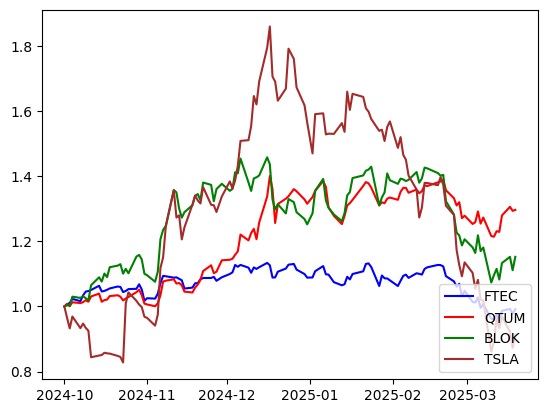

In [ ]:
# Plot
for stock, color in zip(stocks, colors):
    plt.plot(dates, scaled[stock], label=stock, color=color)
plt.legend(loc='lower right')